<a href="https://colab.research.google.com/github/akanksha0911/AdvDL_FinalProject/blob/main/IM_CL_TR_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Project




CIFAR-100 Image Recognition Using Transfer Learning - EfficientNet-B0

Abstract:
Convolutional neural network (CNN) is a class of deep neural network commonly used to analyze images. The objective of this project is to build a convolutional neural network model that can correctly recognize and classify colored images of objects into one of the 100 available classes for CIFAR-100 dataset. The recognition of images in this project has been done using transfer learning approach.

 The network built in this project uses the state-of-the-art EfficientNet-B0 which was trained on the popular, challenging and large ImageNet dataset. 
 
 Transfer learning and the idea of intelligently scaling the network (carefully balancing the network's width, depth and resolution) helped in getting a good performance on this dataset. By just training the model for 15 epochs, the model managed to achieve an accuracy of 82 percent. This is definitely a much better performance than the one achieved using a 9-layer convolutional neural network model trained for 100 epochs. The training of the model has been done on a GPU and the model has also been tested on some new random images to visualize the top 5 category predictions along with their probabilities.


---



The motivation behind working on this dataset using transfer learning is the challenge of achieving a good
accuracy score (more than 59 % as achieved using a
9-layer convolutional neural network built earlier). The
dataset has 100 classes but just 600 images in each
class (500 for training and 100 for testing). The most
interesting part of this dataset is the image quality. Each
of the image in the dataset is of 32 × 32 pixels which
makes recognition a challenging task for machine. So
in order to train the machine to correctly recognize and
classify the images better than earlier, transfer learning
approach has been used. However, the main limitation
for building a deep neural network for CIFAR-100 with
millions of parameters is memory. But, I felt that dealing
with all these challenges would be a great learning and I
decided to proceed with this dataset.

In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torchvision.models as models
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import tensorflow as tf
import keras
get_ipython().run_line_magic('matplotlib', 'inline')
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense 
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
from skimage.transform import resize
import seaborn as sns
import cv2

In [ ]:
def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

In [ ]:
trainData = unpickle('/content/drive/MyDrive/AdvDLProject/cifar-100-python/train')

In [ ]:
#type of items in each file
for item in trainData:
    print(item, type(trainData[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


In [ ]:
print(len(trainData['data']))
print(len(trainData['data'][0]))

50000
3072


In [ ]:

print(np.unique(trainData['fine_labels']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [ ]:
print(np.unique(trainData['coarse_labels']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
print(trainData['batch_label'])

training batch 1 of 1


In [ ]:
print(len(trainData['filenames']))

50000


In [ ]:
testData = unpickle('/content/drive/MyDrive/AdvDLProject/cifar-100-python/test')
#testData

In [ ]:
metaData = unpickle('/content/drive/MyDrive/AdvDLProject/cifar-100-python/meta')
#metaData

In [ ]:
#storing coarse labels along with its number code in a dataframe
category = pd.DataFrame(metaData['coarse_label_names'], columns=['SuperClass'])
category


,SuperClass
0,aquatic_mammals
1,fish
2,flowers
3,food_containers
4,fruit_and_vegetables
5,household_electrical_devices
6,household_furniture
7,insects
8,large_carnivores
9,large_man-made_outdoor_things


In [ ]:
#storing fine labels along with its number code in a dataframe
subCategory = pd.DataFrame(metaData['fine_label_names'], columns=['SubClass'])
subCategory

,SubClass
0,apple
1,aquarium_fish
2,baby
3,bear
4,beaver
...,...
95,whale
96,willow_tree
97,wolf
98,woman


In [ ]:
# The above list shows fine label number and name, which we are denoting as subcategories.


X_train = trainData['data']
X_train

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       ...,
       [248, 240, 236, ..., 180, 174, 205],
       [156, 151, 151, ..., 114, 107, 126],
       [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8)

In [ ]:
#4D array input for building the CNN model using Keras
X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)
#X_train

Image number selected : 7394
Shape of image : (32, 32, 3)
Image category number: 0
Image category name: Aquatic_mammals
Image subcategory number: 55
Image subcategory name: Otter


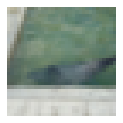

In [ ]:
#generating a random number to display a random image from the dataset along with the label's number and name

rcParams['figure.figsize'] = 2,2

imageId = np.random.randint(0, len(X_train))

plt.imshow(X_train[imageId])

plt.axis('off')

print("Image number selected : {}".format(imageId))
print("Shape of image : {}".format(X_train[imageId].shape))
print("Image category number: {}".format(trainData['coarse_labels'][imageId]))
print("Image category name: {}".format(category.iloc[trainData['coarse_labels'][imageId]][0].capitalize()))
print("Image subcategory number: {}".format(trainData['fine_labels'][imageId]))
print("Image subcategory name: {}".format(subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()))

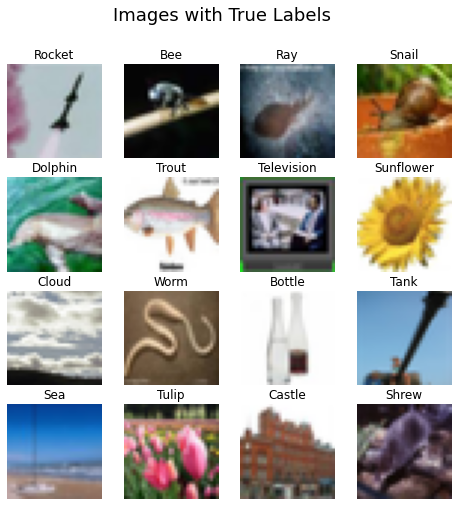

In [ ]:
#16 random images to display at a time along with their true labels
rcParams['figure.figsize'] = 8,8

num_row = 4
num_col = 4

#to get 4 * 4 = 16 images together
imageId = np.random.randint(0, len(X_train), num_row * num_col)
#imageId

fig, axes = plt.subplots(num_row, num_col)
plt.suptitle('Images with True Labels', fontsize=18)

for i in range(0, num_row):
    for j in range(0, num_col):
        k = (i*num_col)+j
        axes[i,j].imshow(X_train[imageId[k]])
        axes[i,j].set_title(subCategory.iloc[trainData['fine_labels'][imageId[k]]][0].capitalize())
        axes[i,j].axis('off')

In [ ]:
# ## Data Pre-processing

#transforming the testing dataset
X_test = testData['data']
X_test = X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1)
X_test.shape


(10000, 32, 32, 3)

In [ ]:
y_train = trainData['fine_labels']
#y_train

y_test = testData['fine_labels']
#y_test

In [ ]:
num_class = 100

y_train = keras.utils.to_categorical(y_train, num_class)
#y_train

y_test = keras.utils.to_categorical(y_test, num_class)
#y_test

In [ ]:
# #### Rescaling by dividing every image pixel by 255

X_train = X_train / 255.
#X_train

X_test = X_test / 255.
#X_test

In [ ]:
#initializing CNN model
model = Sequential()

#Stack 1
#convolution
model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu", input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
#pooling
model.add(MaxPool2D(pool_size=2, strides=2))
#dropout 
model.add(Dropout(0.2))

#Stack 2
#convolution
model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
#pooling
model.add(MaxPool2D(pool_size=2, strides=2))
#dropout 
model.add(Dropout(0.5))

#Stack 3
#convolution
model.add(Conv2D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=3, padding="same", activation="relu"))
#pooling
model.add(MaxPool2D(pool_size=2, strides=2))
#dropout 
model.add(Dropout(0.5))

#flattening
model.add(Flatten())

#full connection
model.add(Dense(units=1000, activation="relu"))
#dropout 
model.add(Dropout(0.5))

#full connection
model.add(Dense(units=1000, activation="relu"))
#dropout 
model.add(Dropout(0.5))

#output layer
model.add(Dense(units=num_class, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)       590080    
                                                        

In [ ]:
epochs = 50
batch_size = 64

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.0001)

#model compiling
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

#saving the model checkpoint for the best model
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [ ]:
#image augmentation to expand the training dataset
#validation split to test the model 
data_gen = ImageDataGenerator(
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            featurewise_center=True,
            width_shift_range=0.1,
            validation_split=0.2)

data_gen.fit(X_train, seed=123)

train_data_gen = data_gen.flow(X_train, y_train, 
                               batch_size=batch_size, 
                               subset="training", seed=123)

valid_data_gen = data_gen.flow(X_train, y_train, 
                               batch_size=batch_size, 
                               subset="validation", seed=123)


In [ ]:
model_history = model.fit_generator(train_data_gen,
                          steps_per_epoch=40000//batch_size,
                          validation_data=valid_data_gen,
                          validation_steps=10000//batch_size,
                          callbacks=[early_stop, model_checkpoint],
                          verbose=1,
                          epochs=epochs)


Epoch 1/50


<ipython-input-29-ecdb339fa809>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(train_data_gen,


624/625 [============================>.] - ETA: 0s - loss: 4.5185 - accuracy: 0.0165
Epoch 1: val_loss improved from inf to 4.40819, saving model to best_model.h5
625/625 [==============================] - 47s 60ms/step - loss: 4.5182 - accuracy: 0.0165 - val_loss: 4.4082 - val_accuracy: 0.0201
Epoch 2/50
625/625 [==============================] - ETA: 0s - loss: 4.2098 - accuracy: 0.0474
Epoch 2: val_loss improved from 4.40819 to 3.93419, saving model to best_model.h5
625/625 [==============================] - 45s 71ms/step - loss: 4.2098 - accuracy: 0.0474 - val_loss: 3.9342 - val_accuracy: 0.0874
Epoch 3/50
625/625 [==============================] - ETA: 0s - loss: 3.8928 - accuracy: 0.0880
Epoch 3: val_loss improved from 3.93419 to 3.67531, saving model to best_model.h5
625/625 [==============================] - 38s 60ms/step - loss: 3.8928 - accuracy: 0.0880 - val_loss: 3.6753 - val_accuracy: 0.1216
Epoch 4/50
625/625 [==============================] - ETA: 0s - loss: 3.6574 - acc

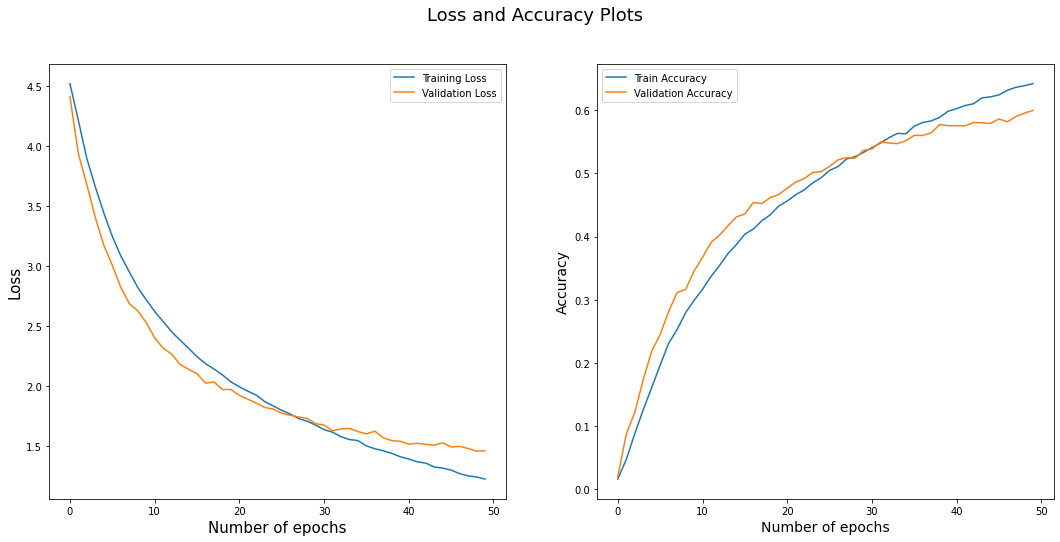

In [ ]:
#plot to visualize the loss and accuracy against number of epochs
plt.figure(figsize=(18,8))

plt.suptitle('Loss and Accuracy Plots', fontsize=18)

plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()


In [ ]:
#train_loss, train_accuracy = model.evaluate_generator(generator=train_data_gen, steps=40000//batch_size)
valid_loss, valid_accuracy = model.evaluate_generator(generator=valid_data_gen, steps=10000//batch_size)
test_loss, test_accuracy = model.evaluate_generator(data_gen.flow(X_test, y_test, seed=123), steps=len(X_test)//batch_size)

print('Validation Accuracy: ', round((valid_accuracy * 100), 2), "%")
print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")
print(" ")
print('Validation Loss: ', round(valid_loss, 2))
print('Test Loss: ', round(test_loss, 2))


<ipython-input-31-62bee48d4ae4>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  valid_loss, valid_accuracy = model.evaluate_generator(generator=valid_data_gen, steps=10000//batch_size)
<ipython-input-31-62bee48d4ae4>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(data_gen.flow(X_test, y_test, seed=123), steps=len(X_test)//batch_size)


Validation Accuracy:  59.29 %
Test Accuracy:  60.52 %
 
Validation Loss:  1.46
Test Loss:  1.44


In [ ]:
y_pred = model.predict(X_test)

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(cm)


313/313 [==============================] - 2s 7ms/step
[[52  0  1 ...  0  1  0]
 [ 0 61  0 ...  0  0  0]
 [ 0  0 27 ...  0 15  0]
 ...
 [ 0  0  0 ... 29  2  1]
 [ 0  1  3 ...  0 33  1]
 [ 0  0  0 ...  0  0 62]]


In [ ]:

#report to see which category has been predicted incorectly and which has been predicted correctly
target = ["Category {}".format(i) for i in range(num_class)]
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target))

              precision    recall  f1-score   support

  Category 0       0.96      0.52      0.68       100
  Category 1       0.79      0.61      0.69       100
  Category 2       0.45      0.27      0.34       100
  Category 3       1.00      0.04      0.08       100
  Category 4       0.67      0.04      0.08       100
  Category 5       0.23      0.48      0.31       100
  Category 6       0.54      0.57      0.56       100
  Category 7       0.48      0.30      0.37       100
  Category 8       0.46      0.64      0.53       100
  Category 9       0.69      0.58      0.63       100
 Category 10       0.42      0.23      0.30       100
 Category 11       0.17      0.45      0.25       100
 Category 12       0.61      0.23      0.33       100
 Category 13       0.67      0.20      0.31       100
 Category 14       0.79      0.15      0.25       100
 Category 15       0.39      0.30      0.34       100
 Category 16       0.54      0.28      0.37       100
 Category 17       0.58    

In [ ]:
#dataframe of predictions
prediction = np.argmax(y_pred, axis=1)
prediction = pd.DataFrame(prediction)
#prediction

True Label: Mouse
Predicted Label: Mouse


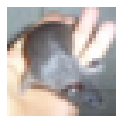

In [ ]:
#generating a random number to display a random image from the dataset along with the true and predicted label
imageId = np.random.randint(0, len(X_test))

rcParams['figure.figsize'] = 2,2

plt.imshow(X_test[imageId])

plt.axis('off')

print("True Label: " + str(subCategory.iloc[testData['fine_labels'][imageId]][0].capitalize()))
print("Predicted Label: " + str(subCategory.iloc[prediction.iloc[imageId]]).split()[2].capitalize())

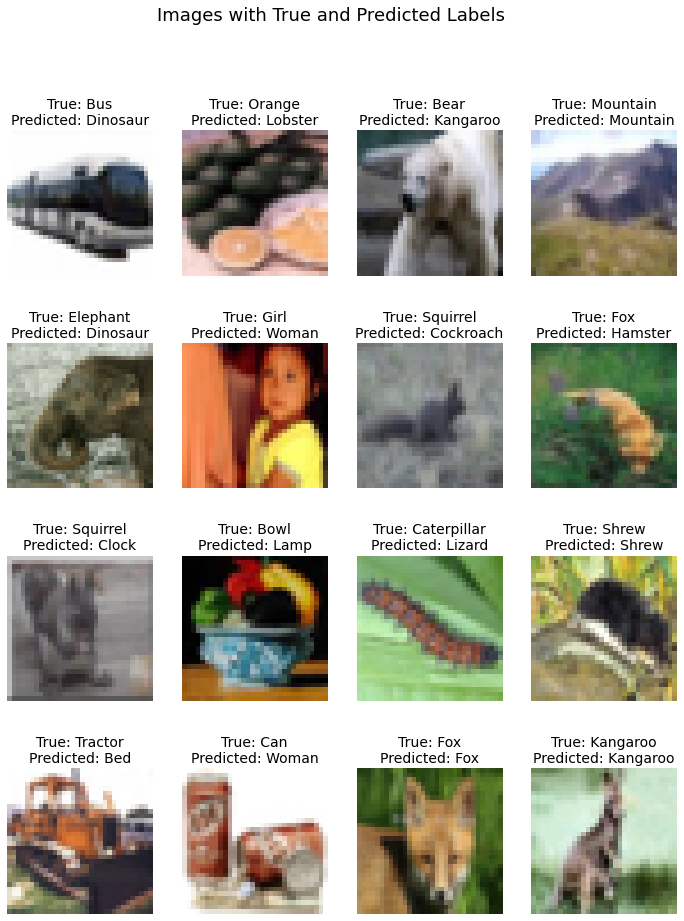

In [ ]:
#16 random images to display at a time along with their true and random labels
rcParams['figure.figsize'] = 12,15

num_row = 4
num_col = 4

imageId = np.random.randint(0, len(X_test), num_row * num_col)

fig, axes = plt.subplots(num_row, num_col)

for i in range(0, num_row):
    for j in range(0, num_col):
        k = (i*num_col)+j
        axes[i,j].imshow(X_test[imageId[k]])
        axes[i,j].set_title("True: " + str(subCategory.iloc[testData['fine_labels'][imageId[k]]][0]).capitalize() 
                             + "\nPredicted: " + str(subCategory.iloc[prediction.iloc[imageId[k]]]).split()[2].capitalize(), 
                            fontsize=14)
        axes[i,j].axis('off')
        fig.suptitle("Images with True and Predicted Labels", fontsize=18) 

plt.show()


In [ ]:
#function to resize the image
def resize_test_image(test_img):

    img = cv2.imread(test_img)
    #plt.imshow(img)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.imshow(img_RGB)
    resized_img = cv2.resize(img_RGB, (32, 32))
    #plt.imshow(resized_img)
    resized_img = resized_img / 255.
    #plt.imshow(resized_img)
    return resized_img
    
#resize_test_image('orange.jpeg')

In [ ]:
#function to get prediction for test image from the model
def predict_test_image(test_img):
    
    resized_img = resize_test_image(test_img)
    prediction = model.predict(np.array([resized_img]))
    
    return prediction

In [ ]:
#function to get the sorted prediction
def sort_prediction_test_image(test_img):
    
    prediction = predict_test_image(test_img)
    
    index = np.arange(0,100)
    
    for i in range(100):
        for j in range(100):
            if prediction[0][index[i]] > prediction[0][index[j]]:
                temp = index[i]
                index[i] = index[j]
                index[j] = temp
                
    return index

In [ ]:
#function to get the dataframe for top 5 predictions
def df_top5_prediction_test_image(test_img):
    
    sorted_index = sort_prediction_test_image(test_img)
    prediction = predict_test_image(test_img)
    
    subCategory_name = []
    prediction_score = []
    
    k = sorted_index[:6] 
    
    for i in range(len(k)):
        subCategory_name.append(subCategory.iloc[k[i]][0])
        prediction_score.append(round(prediction[0][k[i]], 2))
        
    df = pd.DataFrame(list(zip(subCategory_name, prediction_score)), columns=['Label', 'Probability'])  
    
    return df

df_top5_prediction_test_image('/content/orange.jpeg')

1/1 [==============================] - 0s 15ms/step


,Label,Probability
0,orange,1.0
1,sweet_pepper,0.0
2,pear,0.0
3,rose,0.0
4,tulip,0.0
5,lobster,0.0


In [ ]:
#function to get the plot for top 5 predictions 
def plot_top5_prediction_test_image(test_img):
    
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig.suptitle("Prediction", fontsize=18)
    
    new_img = plt.imread(test_img)
    axes[0].imshow(new_img)
    axes[0].axis('off')
    
    data = df_top5_prediction_test_image(test_img)
    x=df_top5_prediction_test_image(test_img)['Label']
    y=df_top5_prediction_test_image(test_img)['Probability']
    
    axes[1] = sns.barplot(x=x, y=y, data=data, color="green")
    
    plt.xlabel('Label', fontsize=14)
    plt.ylabel('Probability', fontsize=14)
    
    plt.ylim(0,1.0)
    
    axes[1].grid(False)
    axes[1].spines["top"].set_visible(False)
    axes[1].spines["right"].set_visible(False)
    axes[1].spines["bottom"].set_visible(False)
    axes[1].spines["left"].set_visible(False)
    
    plt.show()


1/1 [==============================] - 0s 98ms/step


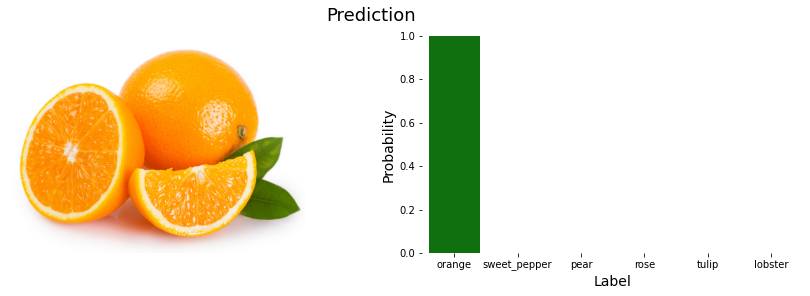

In [ ]:
plot_top5_prediction_test_image('/content/orange.jpeg')

In [ ]:
#saving the trained model as data file in .h5 format
model.save('model10.h5')

1/1 [==============================] - 0s 17ms/step


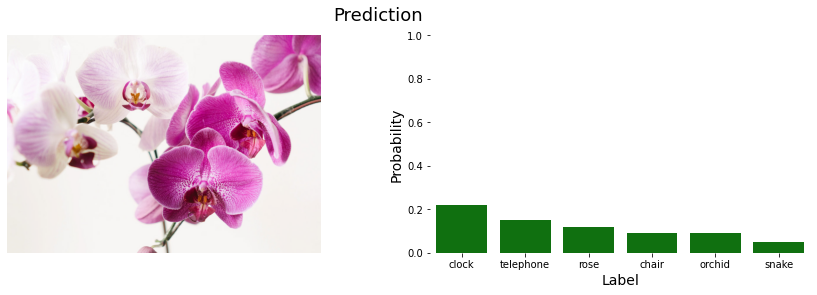

In [ ]:
plot_top5_prediction_test_image('/content/orchid.jpeg')

CONCLUSION:
Recognition of different images is a simple task for we humans as it is easy for us to distinguish between different features. Somehow our brains are trained un- consciously with a similar type of images that has helped us distinguish between features (images) without putting much effort into the task. For instance, after seeing a few cats, we can recognize almost every different type of cat we encounter in our life. However, machines need a lot of training for feature extraction which becomes a challenge due to high computation cost, memory requirement and processing power. The 9-layer deep neural network model built in this project for CIFAR-100 dataset recognizes and classifies colored images of objects in one of the 100 available categories with 59% accuracy. The ConvNet architecture of the model has three stacks of CONV-RELU layers followed by a POOL layer and then two fully connected (FC) RELU layers followed by a fully connected output layer. The model uses 13,870,484 trainable parameters which has been trained for an hour an half on a GPU with 8vCPUs. The Adam optimizer with learning rate 0.0001 and categorical cross entropy loss has been used to used to support the training process which involved 100 epochs and 64 as the batch size. The reported loss is 1.47. The model used techniques like early stopping and dropout to avoid overfitting. Even after training the model with millions of parameters, the model predicted the class for a few images completely wrong. As it is considered that the performance of a deep learning model increases with the amount of data used in its training, it would be highly possible that such a mediocre accuracy was due to the limited size of the dataset for each class. It is believed that the accuracy of this dataset can be further improved by working on different factors related to model building and hyperparameter tuning.